# Protein Isoelectric Point Calculator

In [5]:
#base code taken from https://petercollingridge.co.uk/python-bioinformatics-tools/predicting-pi/

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

pKa = {'D':4.05, 'E':4.45, 'H':5.98, 'C':9.0, 'Y':10.0, 'K':10.0, 'R':12, 'N-term':7.5, 'C-term':3.55}
charges = {'D':-1,  'E':-1,  'H':+1,  'C':-1,  'Y':-1,   'K':1,    'R':1,  'N-term':1, 'C-term':-1}
    
def calculateAminoAcidCharge(amino_acid, pH):
    ratio = 1 / (1 + 10**(pH - pKa[amino_acid]))
    if charges[amino_acid] == 1:
        return ratio
    else:
        return ratio - 1

def calculateProteinCharge(sequence, pH):
    protein_charge = calculateAminoAcidCharge('N-term', pH) + calculateAminoAcidCharge('C-term', pH)
    for amino_acid in pKa.keys():
        protein_charge += sequence.count(amino_acid) * calculateAminoAcidCharge(amino_acid, pH)
    return protein_charge

def calculateIsoelectricPoint(sequence):   
    min_pH, max_pH = 1, 14 
    while True:
        mid_pH = 0.5 * (max_pH + min_pH)
        protein_charge = calculateProteinCharge(sequence, mid_pH)
        if protein_charge > 0.5:
            min_pH = mid_pH
        elif protein_charge < -0.5:
            max_pH = mid_pH
        else:
            return mid_pH

class PI():
    
    def seq(self):
        self.seq

    def pi_curve(self, phLow, phHigh):
    
        #Generating pH Values
        pHs = np.linspace(phLow, phHigh, 1000)

        #Calculating Charge at given pH
        X = calculateProteinCharge(self.seq, pHs)

        #PI Value
        PI_Final = round(calculateIsoelectricPoint(self.seq),1)

        print()
        print ()
        print ("Your protein's PI is", PI_Final)
        print ()

        plt.plot(pHs, X)
        plt.plot(PI_Final, 0, 'ro')
        plt.xlabel('pH')
        plt.ylabel('Charge')
        plt.title('Charges of Protein')
        plt.show()



Your protein's PI is 5.6



<IPython.core.display.Javascript object>


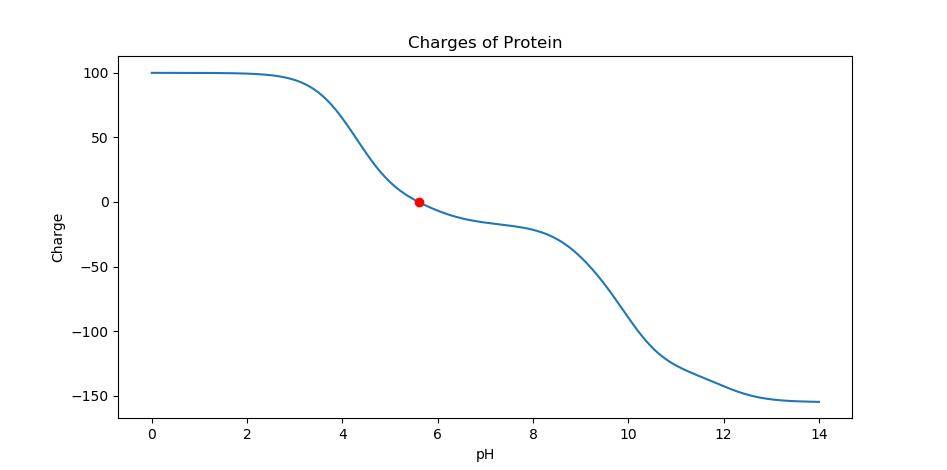

In [6]:
BSA = PI() #Bovine Serum Albumin Example
BSA.seq = "DTHKSEIAHRFKDLGEEHFKGLVLIAFSQYLQQCPFDEHVKLVNELTEFAKTCVADESHAGCEKSLHTLFGDELCKVASLRETYGDMADCCEKQEPERNECFLSHKDDSPDLPKLKPDPNTLCDEFKADEKKFWGKYLYEIARRHPYFYAPELLYYANKYNGVFQECCQAEDKGACLLPKIETMREKVLASSARQRLRCASIQKFGERALKAWSVARLSQKFPKAEFVEVTKLVTDLTKVHKECCHGDLLECADDRADLAKYICDNQDTISSKLKECCDKPLLEKSHCIAEVEKDAIPENLPPLTADFAEDKDVCKNYQEAKDAFLGSFLYEYSRRHPEYAVSVLLRLAKEYEATLEECCAKDDPHACYSTVFDKLKHLVDEPQNLIKQNCDQFEKLGEYGFQNALIVRYTRKVPQVSTPTLVEVSRSLGKVGTRCCTKPESERMPCTEDYLSLILNRLCVLHEKTPVSEKVTKCCTESLVNRRPCFSALTPDETYVPKAFDEKLFTFHADICTLPDTEKQIKKQTALVELLKHKPKATEEQLKTVMENFVAFVDKCCAADDKEACFAVEGPKLVVSTQTALA"
BSA.pi_curve(0,14)